In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
from flask import Flask
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt
import numpy as np
import pandas as pd

from flask import Flask, jsonify

import datetime as dt
from datetime import timedelta

In [3]:
engine = create_engine('sqlite:///resources/hawaii.sqlite')

In [4]:
Base = automap_base()
Base.prepare(engine, reflect = True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
session = Session(engine)

In [8]:
engine.execute('SELECT * FROM  Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [9]:
engine.execute('SELECT * FROM  Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data.

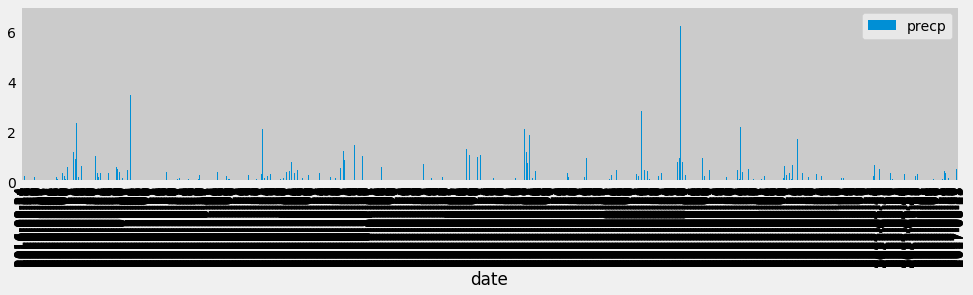

<Figure size 432x288 with 0 Axes>

In [18]:
#ask ESME about .date
# find last date in the data
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Convert to date time format
last_date = dt.datetime.strptime(last_date, "%Y-%m-%d")

# find first date of the year of data
first_date = last_date - timedelta(days=365)

# Query the previous year's data
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()

# Make Panda's DF of the data

last_year_df = pd.DataFrame(last_year_data, columns=['date', 'precp'])

# Set Index as Date
last_year_df.set_index(last_year_df['date'], inplace=True)

# Sort index
last_year_df = last_year_df.sort_index()

# Use Pandas to Plot
last_year_df.plot(kind="bar", figsize=(15,3))
plt.show()
plt.tight_layout()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()

,precp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
